In [8]:
import seaborn as sns
import pandas as pd
sns.set()
pd.options.display.expand_frame_repr = False

from scipy.stats import boxcox
from dfprepare import norm_data

from importlib import reload
import Task_3.LRR as LRR
reload(LRR)
from Task_3.LRR import *

,carbon_monoxide,tar,nicotine,weight
0,14.1,0.86,0.9853,13.6
1,16.0,1.06,1.0938,16.6
2,29.8,2.03,1.1650,23.5
3,8.0,0.67,0.9280,10.2
4,4.1,0.40,0.9462,5.4
5,15.0,1.04,0.8885,15.0
6,8.8,0.76,1.0267,9.0
7,12.4,0.95,0.9225,12.3
8,16.6,1.12,0.9372,16.3
9,14.9,1.02,0.8858,15.4


,carbon_monoxide,tar,nicotine,weight
0,0.454861,0.384211,0.526981,0.550000
1,0.520833,0.489474,0.812582,0.686364
2,1.000000,1.000000,1.000000,1.000000
3,0.243056,0.284211,0.376152,0.395455
4,0.107639,0.142105,0.424059,0.177273
5,0.486111,0.478947,0.272177,0.613636
6,0.270833,0.331579,0.635957,0.340909
7,0.395833,0.431579,0.361674,0.490909
8,0.541667,0.521053,0.400369,0.672727
9,0.482639,0.468421,0.265070,0.631818


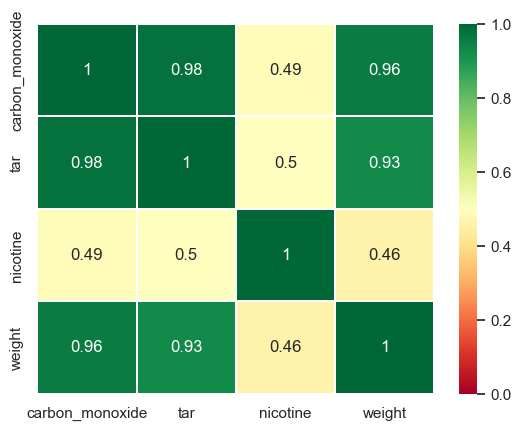

In [9]:
# Read dataframe
data = pd.read_csv('cigarettes.txt', names=['Brand', 'carbon_monoxide', 'tar', 'nicotine', 'weight'])
data = data.drop('Brand', axis=1)
data.dropna(inplace=True)
display(data)

# Normalization
data = norm_data(data)
display(data)

# Correlation
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

# Dependent variable
explore_column = 'carbon_monoxide' 

### Строим базовую модель

                         carbon_monoxide
Model:              OLS              Adj. R-squared:     0.970    
Dependent Variable: carbon_monoxide  AIC:                -94.2398 
Date:               2023-12-08 03:58 BIC:                -89.3643 
No. Observations:   25               Log-Likelihood:     51.120   
Df Model:           3                F-statistic:        258.3    
Df Residuals:       21               Prob (F-statistic): 9.95e-17 
R-squared:          0.974            Scale:              0.0011672
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const      -0.0436     0.0196   -2.2298   0.0368   -0.0843   -0.0029
tar         0.6650     0.1014    6.5598   0.0000    0.4542    0.8758
nicotine    0.0022     0.0349    0.0645   0.9492   -0.0703    0.0748
weight      0.3406     0.0857    3.9736   0.0007    0.1623    0.5188
-------

,Variable,VIF,Tolerance
0,const,8.199589,0.121957
1,tar,7.338188,0.136273
2,nicotine,1.333667,0.749813
3,weight,7.011605,0.142621


,const,tar,nicotine,weight,F-statistic,Prob (F-statistic),df_denom,df_num
0,1.0,0.0,0.0,0.0,4.972225,0.03680247114913934,21.0,1.0
1,0.0,1.0,0.0,0.0,43.030412,1.6959232406336958e-06,21.0,1.0
2,0.0,0.0,1.0,0.0,0.004155,0.9492141011532063,21.0,1.0
3,0.0,0.0,0.0,1.0,15.789224,0.0006920652484494694,21.0,1.0
4,"[1.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 1.0]",1005.799098,1.1754333663979179e-23,21.0,4.0


,dfb_const,dfb_tar,dfb_nicotine,dfb_weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.010305,-0.257601,0.080907,0.258683,0.045853,1.647378,0.063306,0.428268,1.722848,0.447888
1,-0.022931,-0.023380,0.031074,0.023474,0.000576,0.107551,0.166207,0.048019,0.104988,0.046874
2,-1.113964,1.748143,0.437587,-1.186843,1.411701,1.759391,0.645920,2.376301,1.859498,2.511509
3,-0.200628,0.068926,0.053222,-0.031238,0.019624,-1.140943,0.056872,-0.280173,-1.149649,-0.282311
4,-0.043373,-0.000752,-0.014367,0.021287,0.000876,-0.144423,0.143771,-0.059180,-0.141012,-0.057783
5,0.005303,0.002482,-0.014528,0.002718,0.000093,0.050699,0.126748,0.019315,0.049480,0.018851
6,-0.096164,-0.118868,-0.151164,0.188609,0.022024,-0.743327,0.137515,-0.296810,-0.735148,-0.293544
7,-0.073103,-0.080587,0.074278,0.063113,0.005045,-0.475323,0.081996,-0.142057,-0.466383,-0.139385
8,0.002180,0.002799,-0.047204,0.023911,0.001932,0.269659,0.096071,0.087911,0.263617,0.085941
9,-0.002834,0.000823,0.009393,-0.004274,0.000042,-0.032474,0.138078,-0.012997,-0.031692,-0.012685


,student_resid,unadj_p,bonferroni(p)
0,1.722848,0.100344,1.0
1,0.104988,0.917431,1.0
2,1.859498,0.077732,1.0
3,-1.149649,0.263851,1.0
4,-0.141012,0.889271,1.0
5,0.049480,0.961028,1.0
6,-0.735148,0.470783,1.0
7,-0.466383,0.645981,1.0
8,0.263617,0.794772,1.0
9,-0.031692,0.975032,1.0


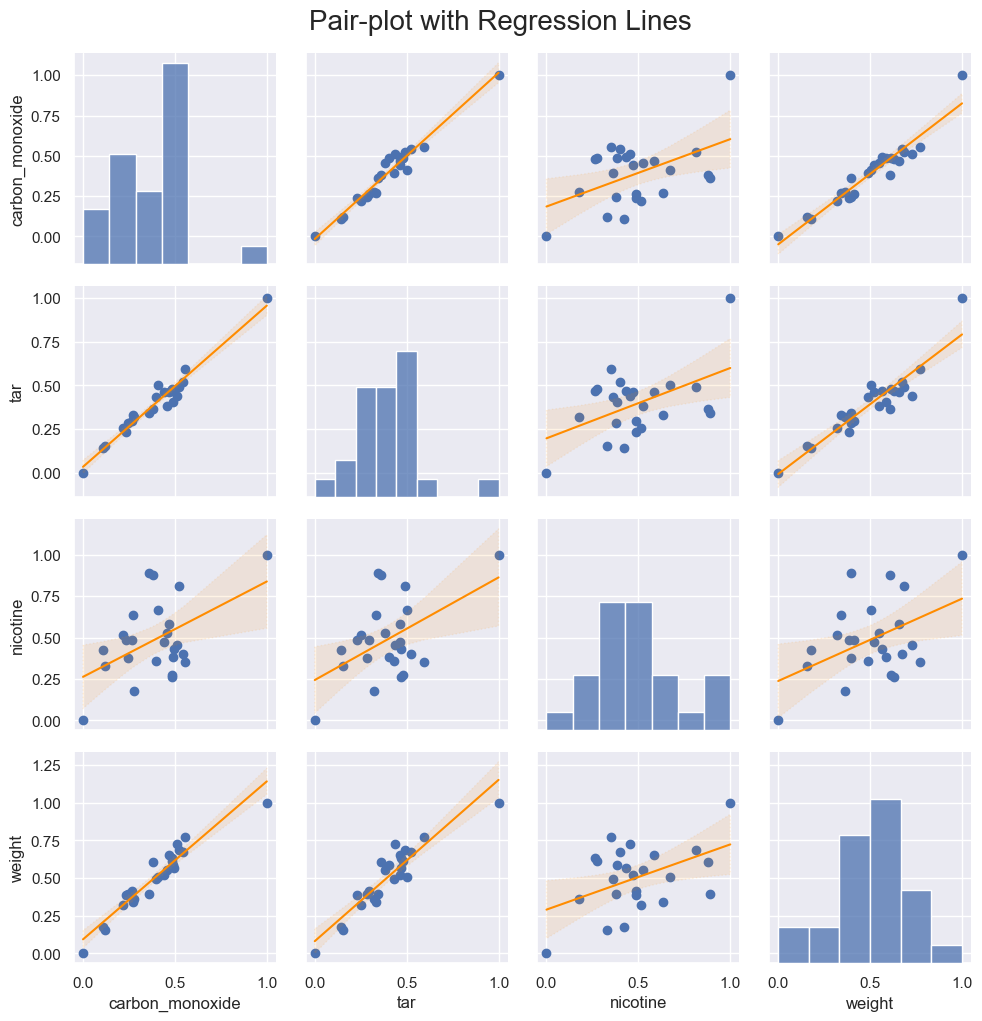

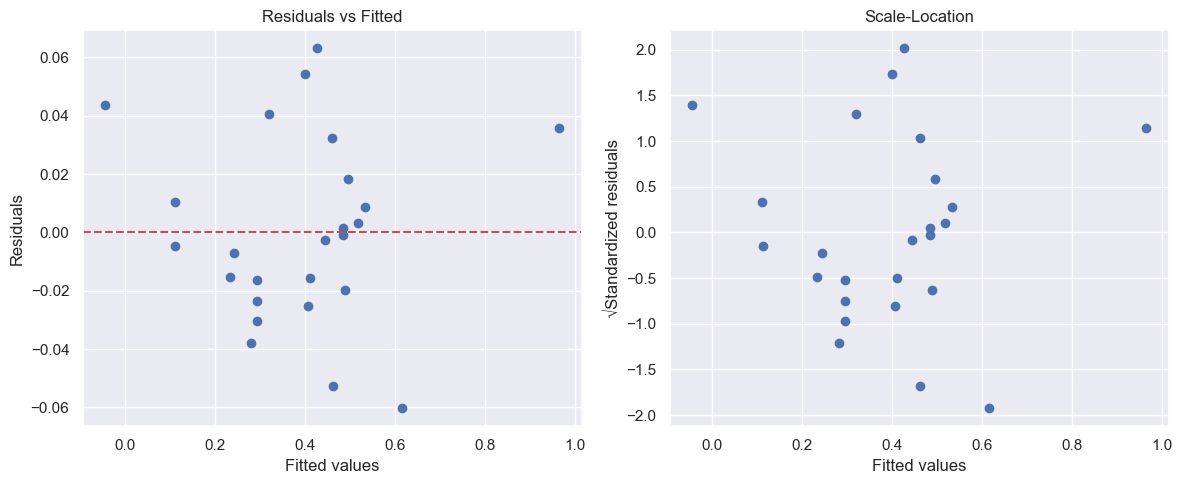

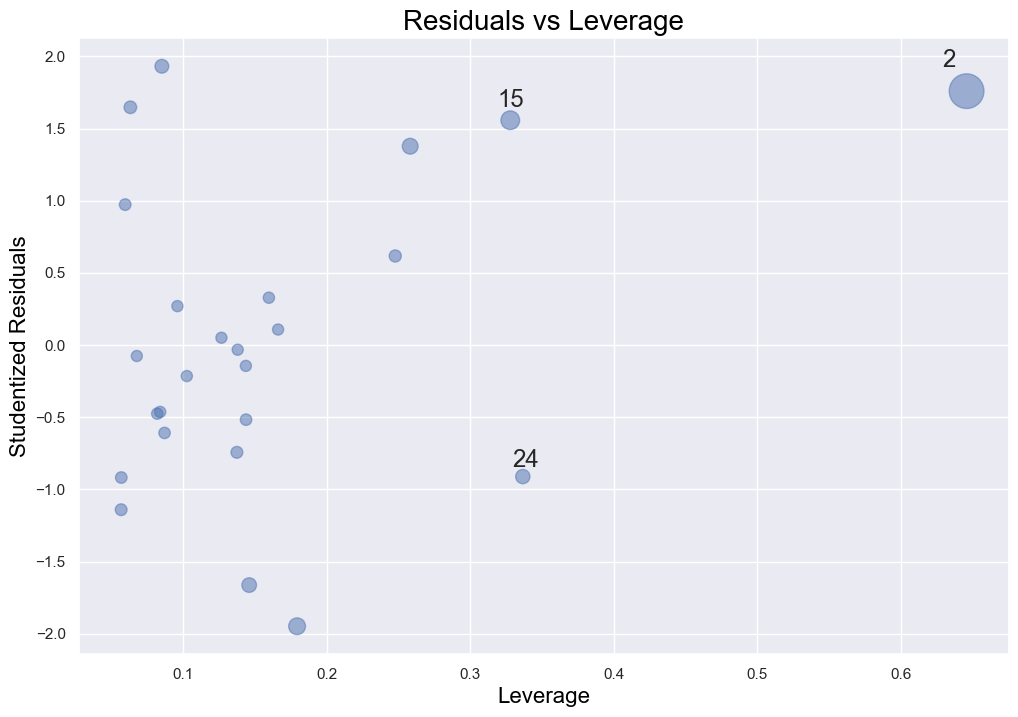

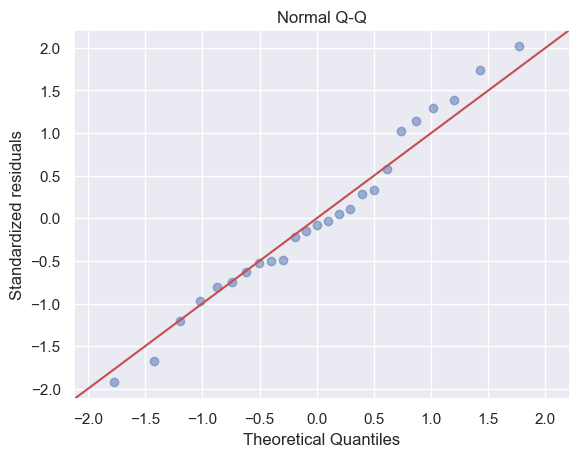

                                STEPS AIC                              
Selected Features: ['tar', 'nicotine', 'weight']
AIC: -94.23981158876805
Selected Features: ['tar', 'weight']
AIC: -96.23486563233041


In [10]:
base_research = LinearRegressionResearch(y=data[explore_column], x=data.drop(columns=explore_column))
base_research.info()
base_research.draw_plots()
new_data = base_research.stepwise_selection(criteria='AIC')

### Проведём исследование улучшенной модели с помощью (AIC/BIC)

In [11]:
display(new_data)

,carbon_monoxide,tar,weight
0,0.454861,0.384211,0.550000
1,0.520833,0.489474,0.686364
2,1.000000,1.000000,1.000000
3,0.243056,0.284211,0.395455
4,0.107639,0.142105,0.177273
5,0.486111,0.478947,0.613636
6,0.270833,0.331579,0.340909
7,0.395833,0.431579,0.490909
8,0.541667,0.521053,0.672727
9,0.482639,0.468421,0.631818


                            carbon_monoxide
Model:                 OLS               Adj. R-squared:      0.979     
Dependent Variable:    carbon_monoxide   AIC:                 -99.8790  
Date:                  2023-12-08 03:58  BIC:                 -87.6902  
No. Observations:      25                Log-Likelihood:      59.939    
Df Model:              9                 F-statistic:         126.2     
Df Residuals:          15                Prob (F-statistic):  1.71e-12  
R-squared:             0.987             Scale:               0.00080698
------------------------------------------------------------------------
                      Coef.   Std.Err.    t    P>|t|    [0.025   0.975] 
------------------------------------------------------------------------
const                  0.0023   0.0273  0.0842 0.9340   -0.0558   0.0604
tar                    2.4468   1.4362  1.7036 0.1091   -0.6145   5.5081
weight                -1.6977   1.2214 -1.3899 0.1848   -4.3011   0.9057
tar&tar

,Variable,VIF,Tolerance
0,const,2.304581e+01,4.339184e-02
1,tar,2.130342e+03,4.694083e-04
2,weight,2.059375e+03,4.855842e-04
3,tar&tar,5.861325e+04,1.706099e-05
4,tar&weight,2.261706e+05,4.421441e-06
5,weight&weight,7.057973e+04,1.416837e-05
6,tar&tar&tar,8.528748e+05,1.172505e-06
7,tar&tar&weight,4.637671e+06,2.156255e-07
8,tar&weight&weight,2.842029e+06,3.518613e-07
9,weight&weight&weight,2.272335e+05,4.400760e-06


,const,tar,weight,tar&tar,tar&weight,weight&weight,tar&tar&tar,tar&tar&weight,tar&weight&weight,weight&weight&weight,F-statistic,Prob (F-statistic),df_denom,df_num
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007090,0.9340113514902728,15.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.902287,0.10907616808049005,15.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.931958,0.1848285572861786,15.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.676320,0.04714537613742947,15.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.768243,0.20346804403363483,15.0,1.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.143816,0.7098308015969848,15.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000544,0.9816919048496393,15.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.139294,0.7142056944169872,15.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.405135,0.5340426106728028,15.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.397854,0.5376922433642572,15.0,1.0


,dfb_const,dfb_tar,dfb_weight,dfb_tar&tar,dfb_tar&weight,dfb_weight&weight,dfb_tar&tar&tar,dfb_tar&tar&weight,dfb_tar&weight&weight,dfb_weight&weight&weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.002488,0.146079,-0.167332,-0.087995,0.010038,0.069516,0.269270,-0.260986,0.265430,-0.285452,0.041772,1.367208,0.182651,0.646312,1.411738,0.667363
1,0.000405,-0.006402,0.006224,-0.008520,0.011501,-0.012584,0.065874,-0.065852,0.063644,-0.055988,0.000925,0.151586,0.286940,0.096159,0.146558,0.092970
2,-0.095497,0.512166,-0.430176,-0.923840,0.491540,-0.194284,0.282505,-0.073274,-0.053331,0.101308,67.779382,0.508685,0.999618,26.034474,0.495731,25.371481
3,0.046438,0.352221,-0.391417,0.251116,-0.325785,0.372753,-0.184341,0.145923,-0.076713,-0.034120,0.049576,-1.462123,0.188247,-0.704102,-1.525423,-0.734585
4,0.045667,-0.065174,0.074172,-0.029116,0.048946,-0.067012,0.019225,-0.014991,0.004040,0.018026,0.002472,0.241747,0.297281,0.157237,0.234006,0.152202
5,-0.015867,-0.038757,0.049965,0.046840,-0.022711,-0.004264,0.068007,-0.074364,0.076006,-0.064797,0.003648,-0.441830,0.157452,-0.191000,-0.429654,-0.185736
6,-0.004811,0.012269,-0.010122,0.009272,-0.011519,0.011373,0.002052,-0.003620,0.006056,-0.008773,0.000060,0.032229,0.365607,0.024467,0.031137,0.023638
7,-0.000184,-0.001422,0.008948,0.087674,-0.075481,0.053281,0.145721,-0.163100,0.180487,-0.184340,0.009575,-0.633325,0.192706,-0.309427,-0.620198,-0.303014
8,0.012618,0.026797,-0.032745,0.011961,-0.022074,0.030476,-0.070407,0.066352,-0.057850,0.041272,0.003757,0.409871,0.182781,0.193840,0.398209,0.188325
9,-0.011934,-0.043707,0.054040,0.049452,-0.025644,-0.001530,-0.066125,0.061433,-0.059304,0.061450,0.005098,-0.561382,0.139235,-0.225782,-0.548135,-0.220455


,student_resid,unadj_p,bonferroni(p)
0,1.411738,0.179866,1.000000
1,0.146558,0.885570,1.000000
2,0.495731,0.627776,1.000000
3,-1.525423,0.149423,1.000000
4,0.234006,0.818367,1.000000
5,-0.429654,0.673987,1.000000
6,0.031137,0.975599,1.000000
7,-0.620198,0.545091,1.000000
8,0.398209,0.696482,1.000000
9,-0.548135,0.592232,1.000000


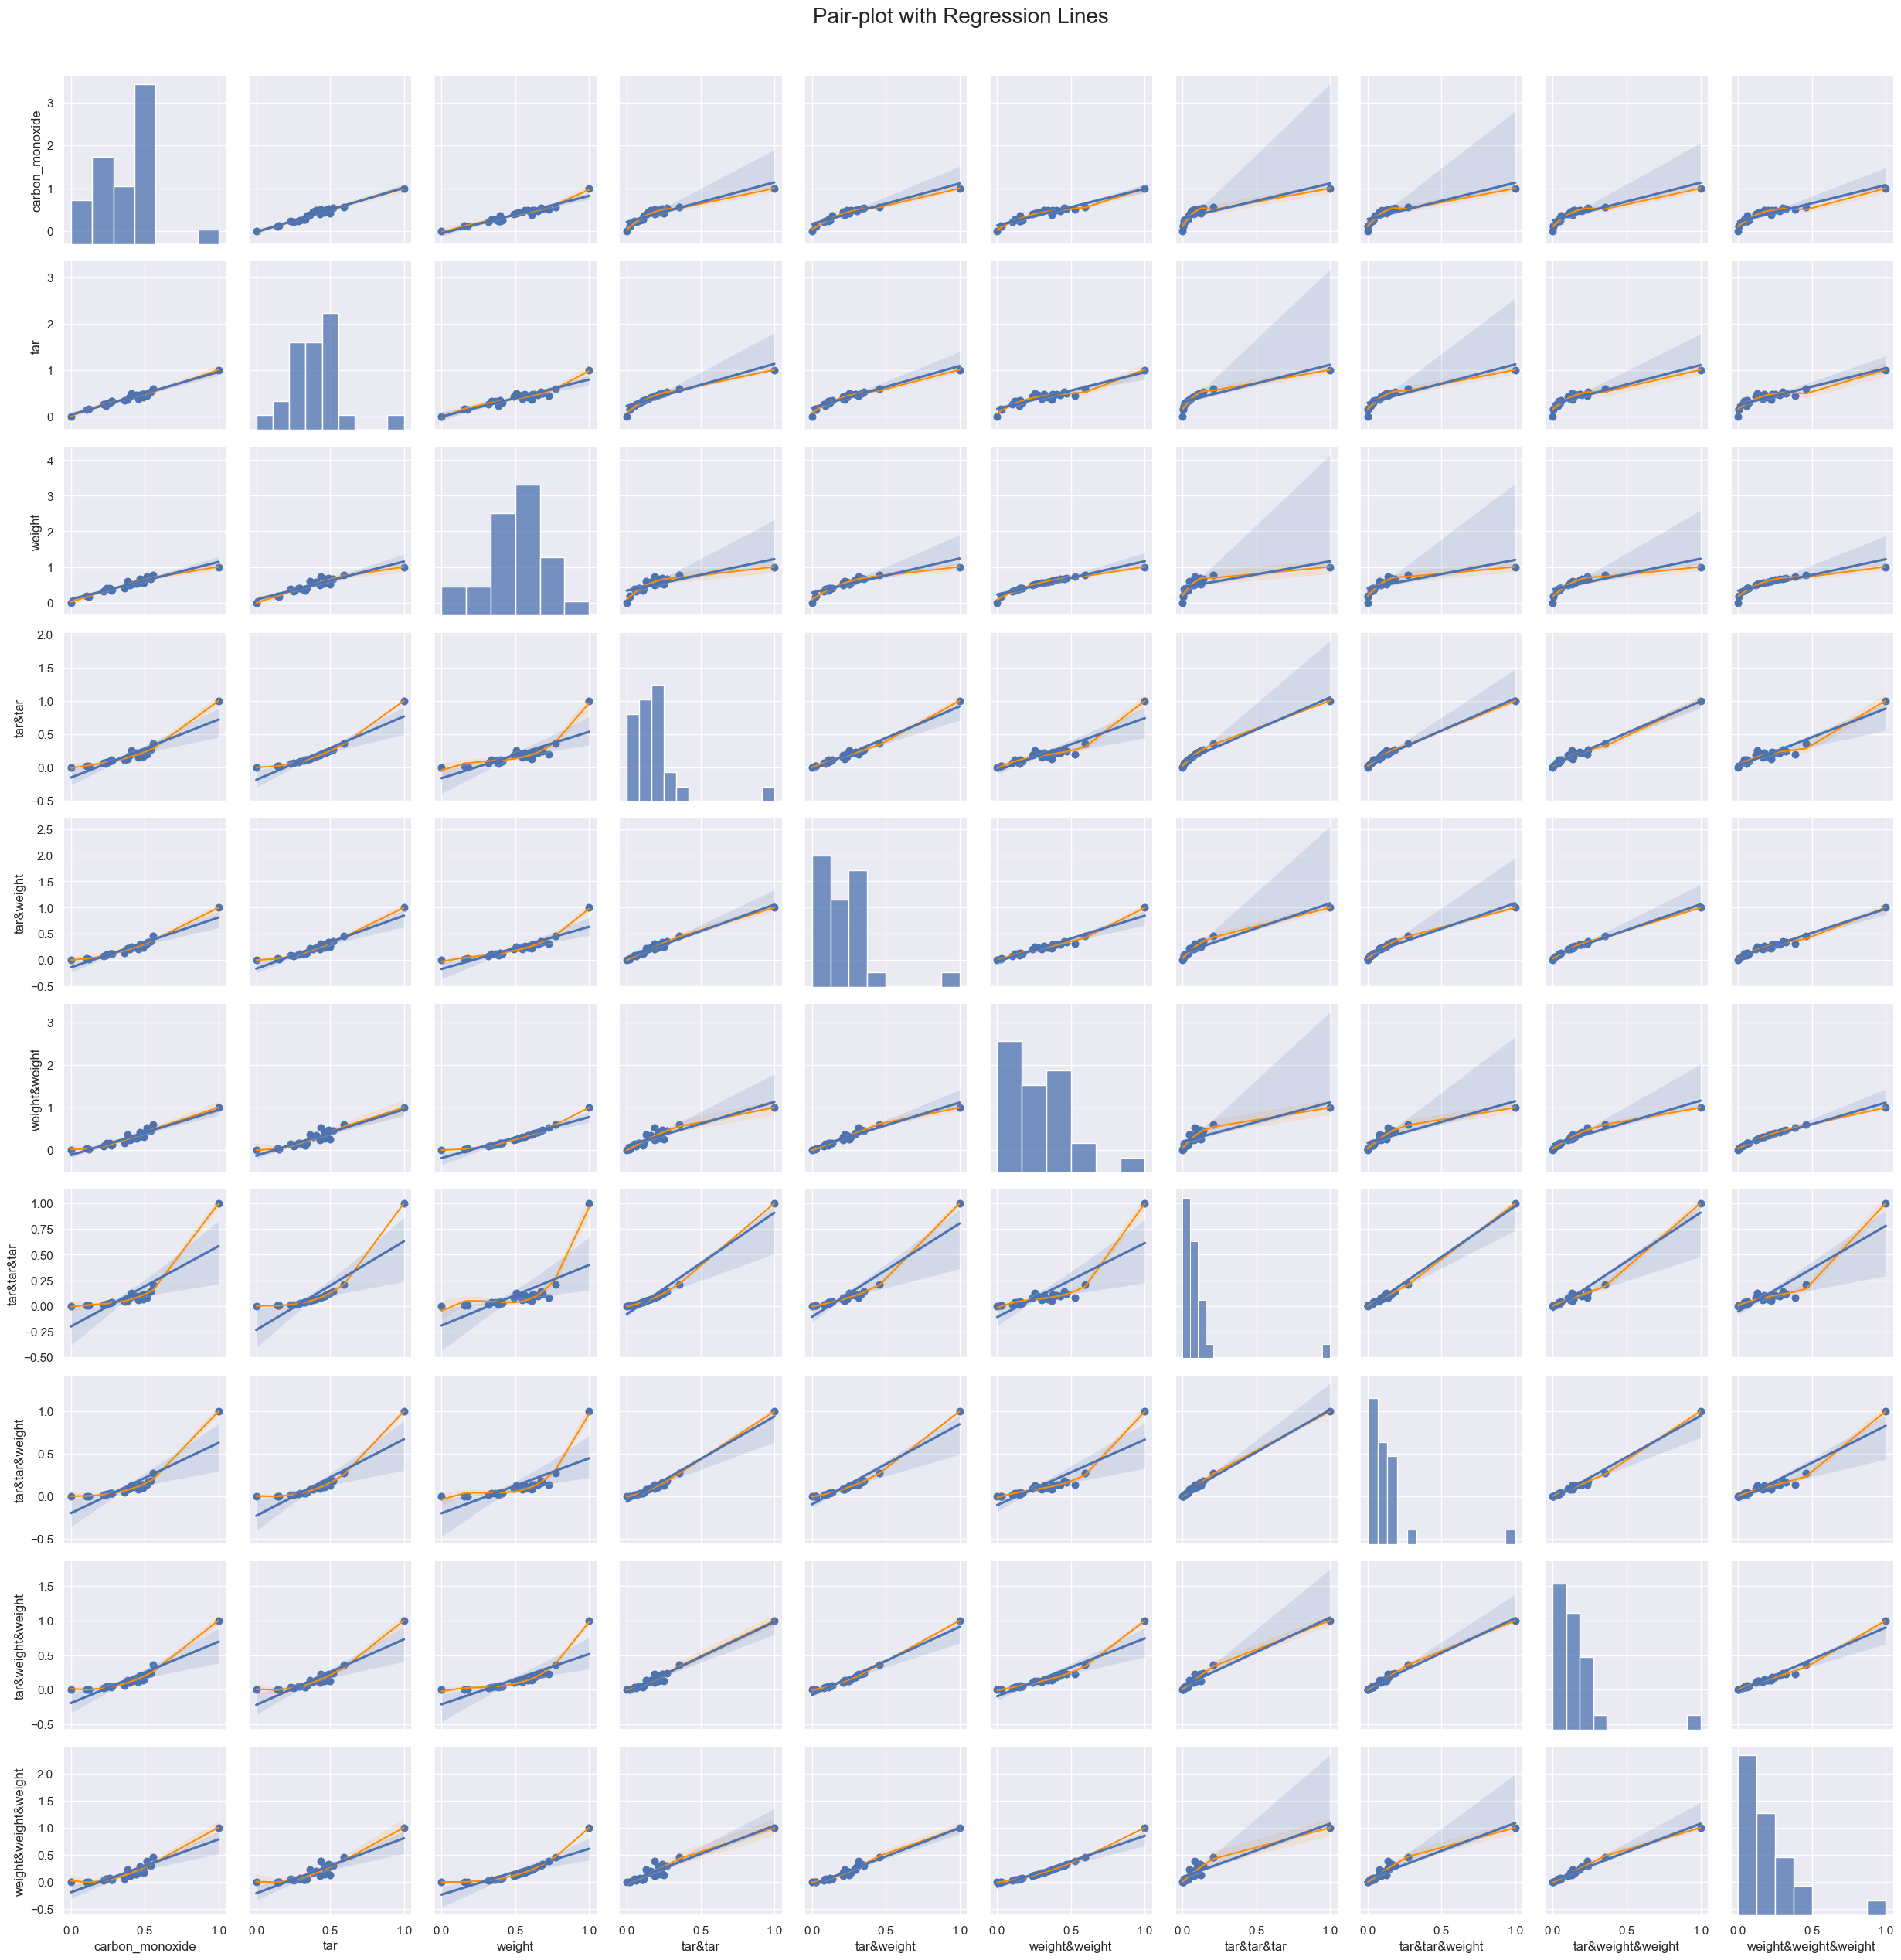

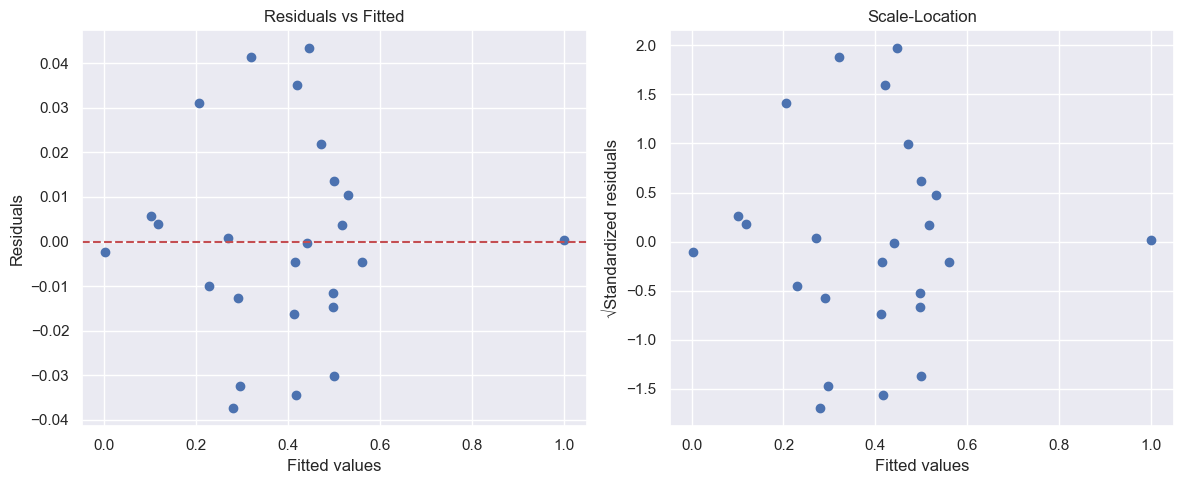

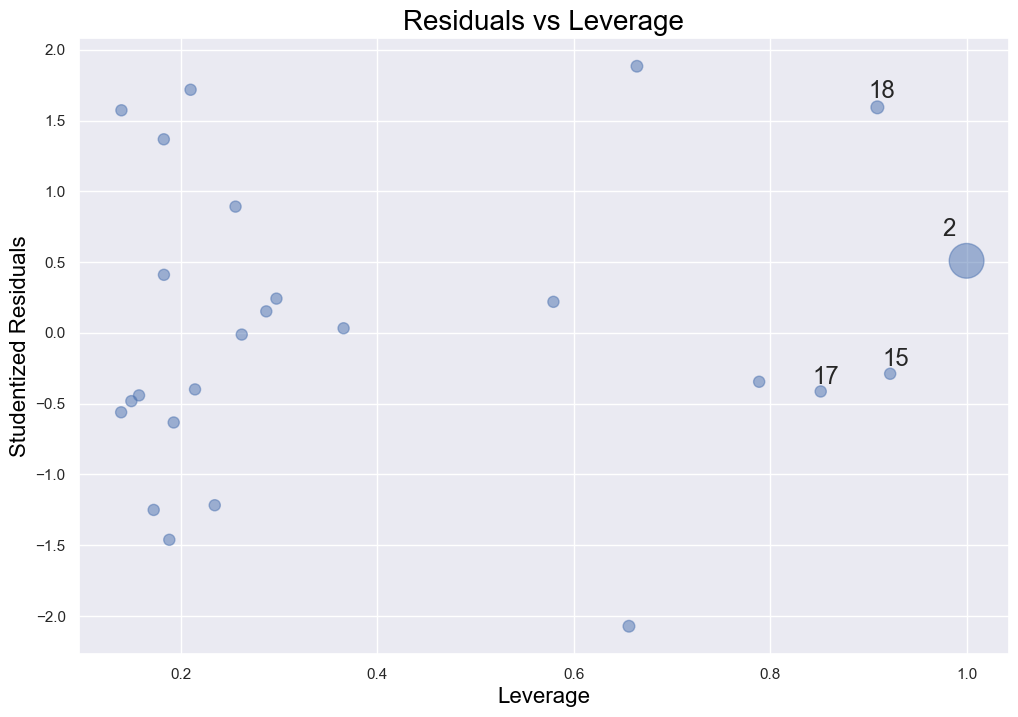

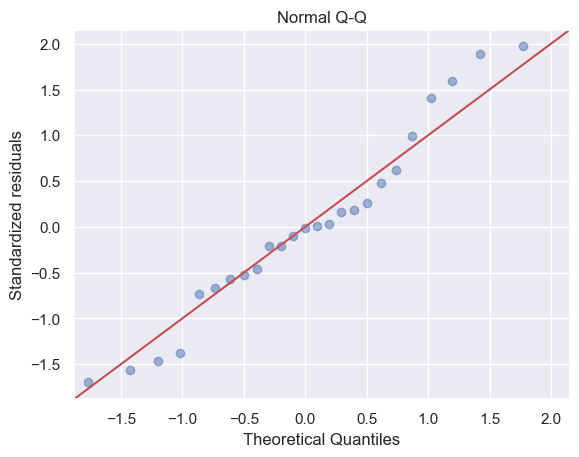

In [12]:
# Проводим анализ заново
enhanced_research = LinearRegressionResearch(y=new_data[explore_column], 
                                             x=new_data.drop(columns=explore_column), degree=3)
enhanced_research.info()
enhanced_research.draw_plots()

### Попытаемся улучшить уже улучшенную модель при помощи (Box-Cox)

In [13]:
# Применяем преобразование Бокса-Кокса к зависимой переменной
y_transformed, lambda_value = boxcox(data[explore_column] + 1e-6)  # + 1 чтобы не было 0-значений
new_data_t = new_data.copy()
new_data_t[explore_column] = y_transformed
display(new_data_t)

,carbon_monoxide,tar,weight
0,-6.276137e-01,0.384211,0.550000
1,-5.397048e-01,0.489474,0.686364
2,9.999998e-07,1.000000,1.000000
3,-9.529931e-01,0.284211,0.395455
4,-1.228423e+00,0.142105,0.177273
5,-5.853793e-01,0.478947,0.613636
6,-9.051851e-01,0.331579,0.340909
7,-7.106973e-01,0.431579,0.490909
8,-5.128836e-01,0.521053,0.672727
9,-5.900174e-01,0.468421,0.631818


                         carbon_monoxide
Model:              OLS              Adj. R-squared:     0.975    
Dependent Variable: carbon_monoxide  AIC:                -73.4647 
Date:               2023-12-08 03:58 BIC:                -66.1514 
No. Observations:   25               Log-Likelihood:     42.732   
Df Model:           5                F-statistic:        187.5    
Df Residuals:       19               Prob (F-statistic): 1.75e-15 
R-squared:          0.980            Scale:              0.0025237
------------------------------------------------------------------
                   Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------
const             -1.6200   0.0408 -39.7227 0.0000 -1.7053 -1.5346
tar                0.8080   0.6455   1.2517 0.2259 -0.5431  2.1590
weight             1.6111   0.5804   2.7757 0.0120  0.3963  2.8260
tar&tar            0.8947   1.9267   0.4643 0.6477 -3.1380  4.9274
tar&weight        -1.

,Variable,VIF,Tolerance
0,const,16.475256,0.060697
1,tar,137.595039,0.007268
2,weight,148.706813,0.006725
3,tar&tar,1286.952029,0.000777
4,tar&weight,4545.193113,0.000220
5,weight&weight,1191.012751,0.000840


,const,tar,weight,tar&tar,tar&weight,weight&weight,F-statistic,Prob (F-statistic),df_denom,df_num
0,1.0,0.0,0.0,0.0,0.0,0.0,1577.889084,9.46784170660376e-20,19.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.566715,0.22587599978773137,19.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,7.704671,0.012043190149092243,19.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.215619,0.6476749499278156,19.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.118050,0.7349315841430323,19.0,1.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.098474,0.7570879370260445,19.0,1.0
6,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",1102.400700,4.1712490927395194e-23,19.0,6.0


,dfb_const,dfb_tar,dfb_weight,dfb_tar&tar,dfb_tar&weight,dfb_weight&weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.074575,-0.293731,0.321373,-0.085574,0.145075,-0.208820,0.037756,1.492946,0.092259,0.475957,1.546677,0.493086
1,0.005142,0.007676,-0.012032,-0.026025,0.019089,-0.009272,0.000749,0.168041,0.137252,0.067024,0.163681,0.065285
2,1.232319,-4.231596,3.021840,4.287163,-2.049439,0.651386,67.252962,2.591377,0.983631,20.087752,3.136775,24.315552
3,-0.010758,0.366935,-0.388238,0.062713,-0.153029,0.249917,0.041207,-1.233828,0.139717,-0.497232,-1.252129,-0.504607
4,0.148926,-0.034723,0.004437,-0.013288,0.020145,-0.019353,0.005624,0.419335,0.161000,0.183693,0.410053,0.179627
5,0.001278,0.001239,-0.001536,0.007192,-0.006769,0.006108,0.000022,-0.033905,0.101826,-0.011416,-0.033002,-0.011112
6,-0.002077,-0.048239,0.039545,-0.031185,0.038365,-0.040643,0.000835,-0.130830,0.226412,-0.070779,-0.127398,-0.068922
7,0.036742,-0.043207,0.017512,0.001349,0.004507,-0.001382,0.003379,-0.417021,0.104402,-0.142382,-0.407769,-0.139223
8,0.001002,0.003613,-0.007402,-0.065836,0.057086,-0.043880,0.001590,0.230950,0.151690,0.097661,0.225107,0.095190
9,0.001493,0.003939,-0.003691,0.016003,-0.014885,0.012896,0.000135,-0.086921,0.096696,-0.028439,-0.084619,-0.027686


,student_resid,unadj_p,bonferroni(p)
0,1.546677,0.139342,1.000000
1,0.163681,0.871806,1.000000
2,3.136775,0.005701,0.142532
3,-1.252129,0.226549,1.000000
4,0.410053,0.686607,1.000000
5,-0.033002,0.974036,1.000000
6,-0.127398,0.900038,1.000000
7,-0.407769,0.688253,1.000000
8,0.225107,0.824432,1.000000
9,-0.084619,0.933498,1.000000


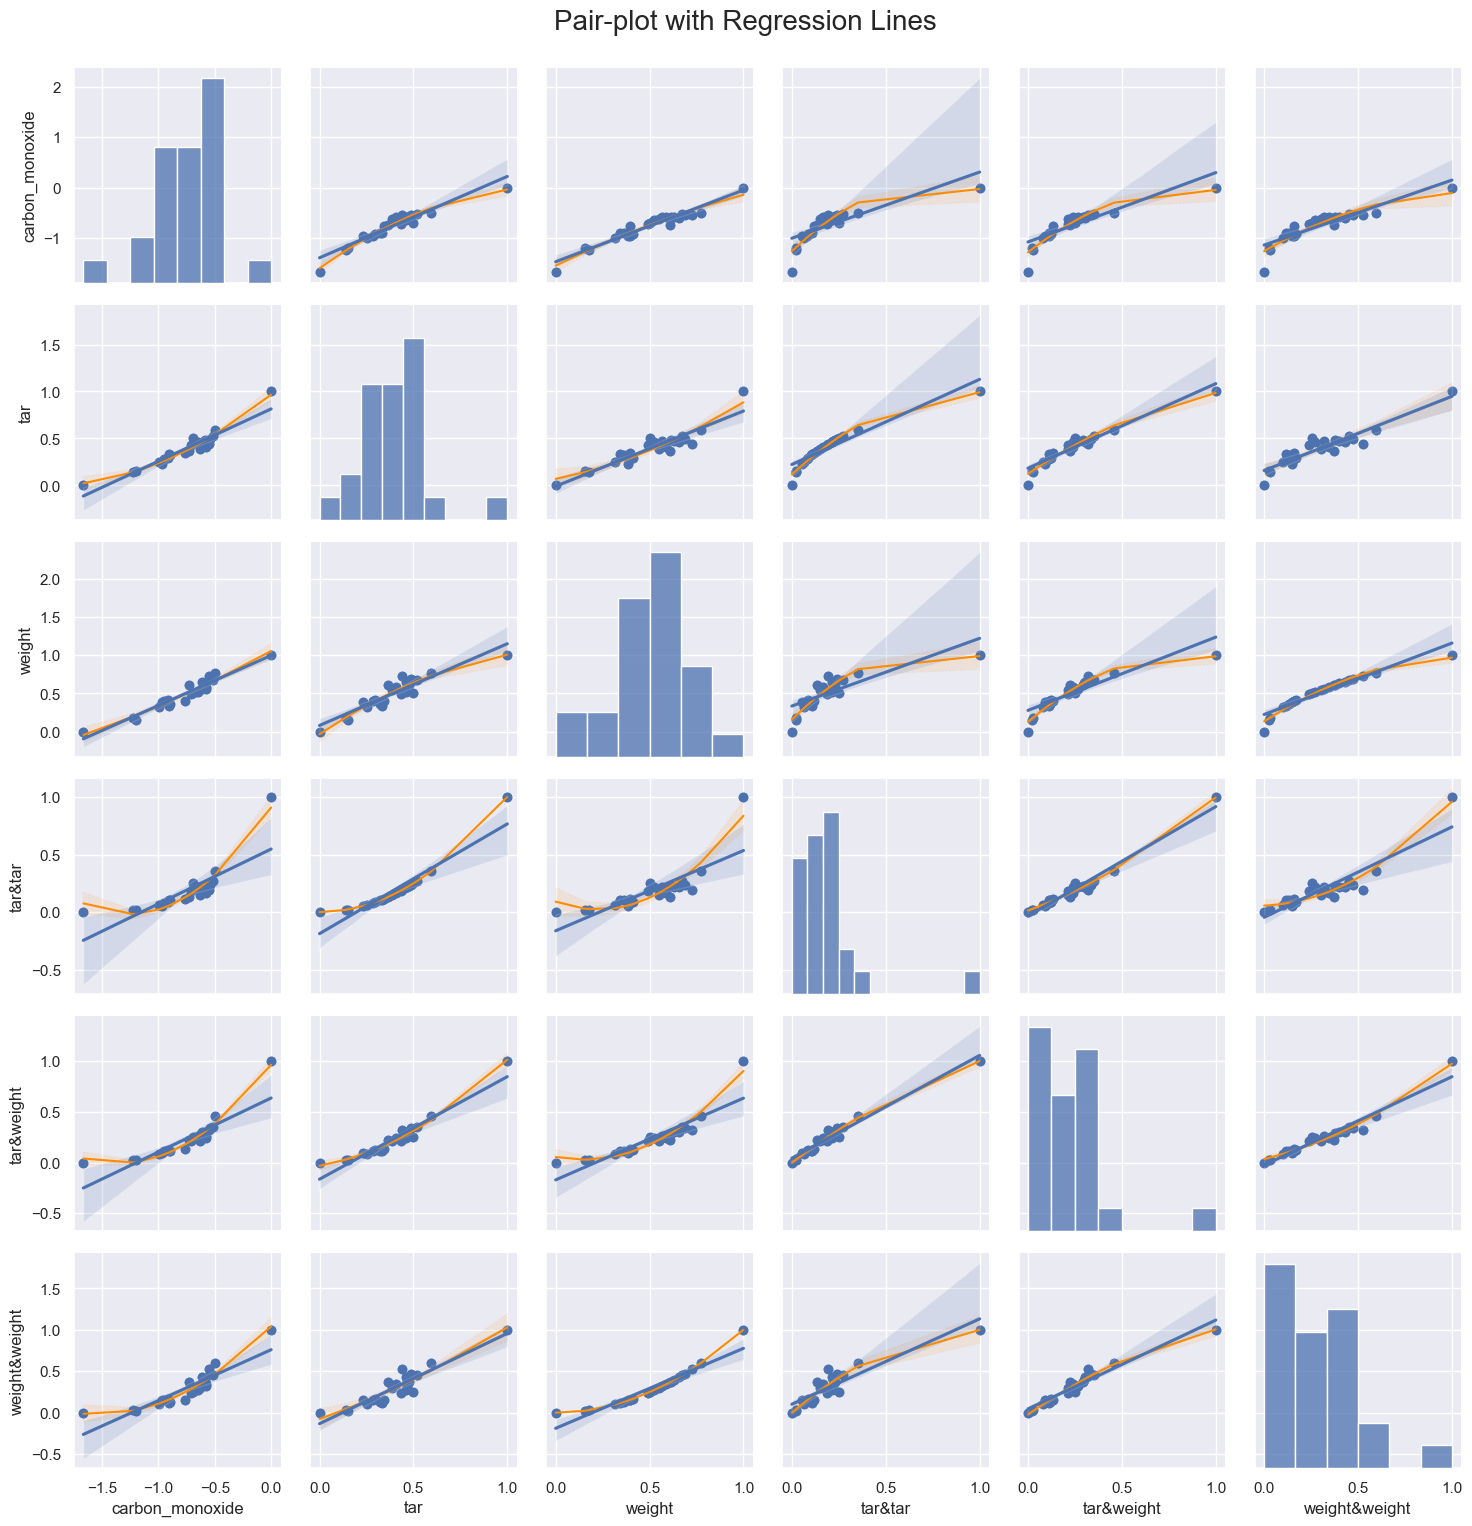

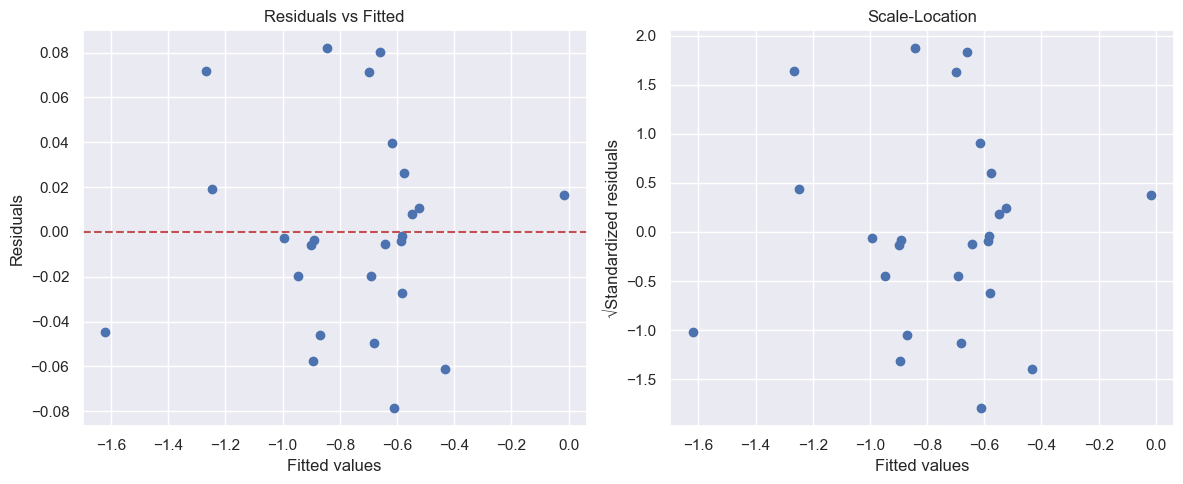

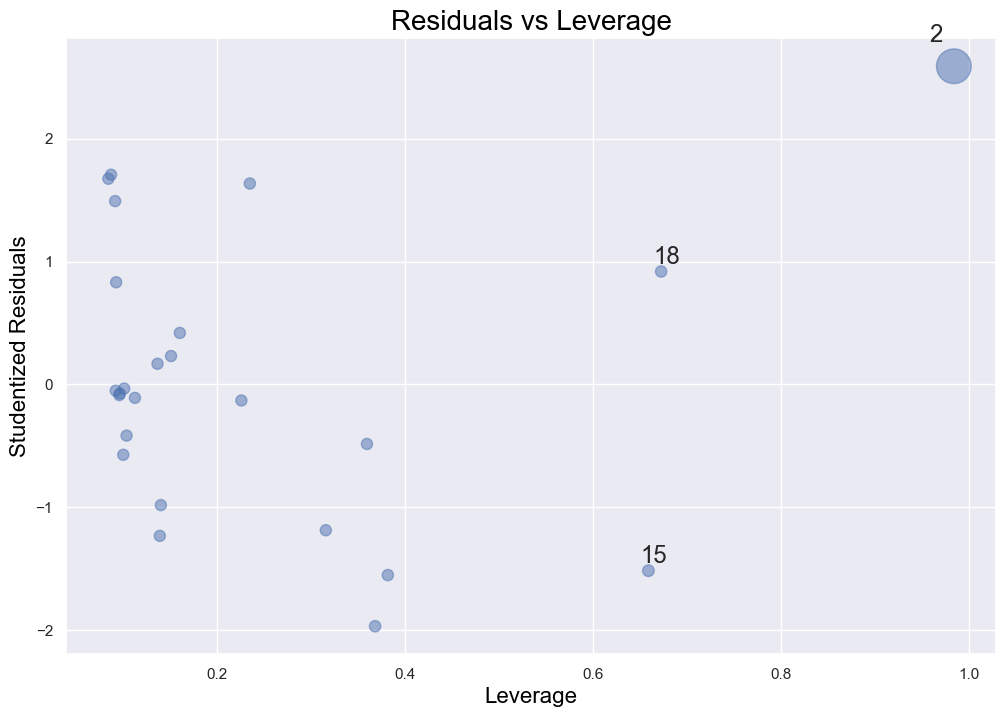

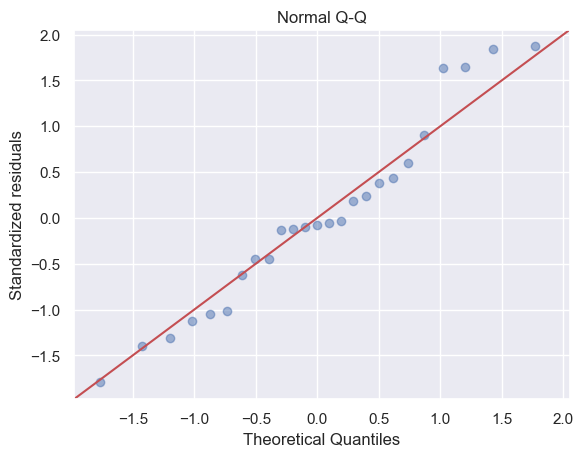

In [14]:
# Проводим анализ заново
enhanced_research = LinearRegressionResearch(y=new_data_t[explore_column], 
                                             x=new_data_t.drop(columns=explore_column), degree=2)
enhanced_research.info()
enhanced_research.draw_plots()